In [3]:
# 1. LIBRARY IMPORTS
# Import essential libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# 2. DATA LOADING & BASIC INFORMATION
# Load the dataset from Kaggle input directory

data = pd.read_csv('/kaggle/input/delhi-ai-quality-cleaned/delhi_air_quality_cleaned.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {data.shape}")
print(f"Total Records: {data.shape[0]}")
print(f"Total Features: {data.shape[1]}")
print(f"\nColumn Names and Data Types:")
print(data.dtypes)
print(f"\nFirst 5 Rows:")
print(data.head())
print(f"\nLast 5 Rows:")
print(data.tail())
print(f"\nMemory Usage:")
print(data.memory_usage(deep=True))
print("="*80)

DATASET OVERVIEW

Dataset Shape: (1461, 12)
Total Records: 1461
Total Features: 12

Column Names and Data Types:
Date         int64
Month        int64
Year         int64
Days         int64
PM2.5      float64
PM10       float64
NO2        float64
SO2        float64
CO         float64
Ozone      float64
AQI          int64
Holiday     object
dtype: object

First 5 Rows:
   Date  Month  Year  Days  PM2.5    PM10    NO2    SO2    CO  Ozone  AQI  \
0     1      1  2021     5  72.06  442.42  30.49  12.95  0.85  43.19  462   
1     2      1  2021     6  72.06  199.80  52.85   5.18  0.85  16.43  482   
2     3      1  2021     7  72.06  239.04  30.49  10.93  1.40  44.29  263   
3     4      1  2021     1  89.55  132.08  30.49  10.42  1.01  49.19  207   
4     5      1  2021     2  54.06   55.54  30.49   9.70  0.64  48.88  149   

      Holiday  
0  No Holiday  
1  No Holiday  
2     Holiday  
3  No Holiday  
4  No Holiday  

Last 5 Rows:
      Date  Month  Year  Days  PM2.5    PM10    NO2    SO

In [5]:
# 3. MISSING VALUES & DATA QUALITY CHECK
# Analyze missing values and data quality

print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

# Check for missing values
missing_counts = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100

missing_df = pd.DataFrame({
    'Column': missing_counts.index,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_percent.values
})

print(f"\nTotal Missing Values:")
print(missing_df)
print(f"\nGood News: No missing values detcted!" if missing_counts.sum() == 0 else f"\n⚠️  Total Missing Values: {missing_count.sum()}")

# Check for duplicates
print(f"\n\DUPLICATE RECORDS:")
duplicate_count = data.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percetage of Duplicates: {(duplicate_count/len(data))*100:.2f}%")

# Check data consistency
print(f"\n\nDATA CONSISTENCY CHECK:")
print(f"Unique values in 'Holiday' column: {data['Holiday'].unique()}")
print(f"Data range: {data['Date'].min()} to {data['Date'].max()}")
print(f"Month range: {data['Month'].min()} to {data['Month'].max()}")
print(f"Year range: {data['Year'].min()} to {data['Year'].max()}")
# print(f"Unique values in 'Holiday' column: {data['Holiday'].unique()}")
# print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")
# print(f"Month range: {data['Month'].min()} to {data['Month'].max()}")
# print(f"Year range: {data['Year'].min()} to {data['Year'].max()}")
print("="*80)


MISSING VALUES ANALYSIS

Total Missing Values:
     Column  Missing_Count  Missing_Percentage
0      Date              0                 0.0
1     Month              0                 0.0
2      Year              0                 0.0
3      Days              0                 0.0
4     PM2.5              0                 0.0
5      PM10              0                 0.0
6       NO2              0                 0.0
7       SO2              0                 0.0
8        CO              0                 0.0
9     Ozone              0                 0.0
10      AQI              0                 0.0
11  Holiday              0                 0.0

Good News: No missing values detcted!

\DUPLICATE RECORDS:
Total Duplicate Rows: 0


DATA CONSISTENCY CHECK:
Unique values in 'Holiday' column: ['No Holiday' 'Holiday']
Data range: 1 to 31
Month range: 1 to 12
Year range: 2021 to 2024


In [6]:
# 4. STATISTICAL SUMMARY & DESCRIPTIVE ANALYSIS
# Comprehensive statistical analysis of numerical features

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)

# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumerical Columns: {numerical_cols}")

# Descriptive statistics
print(f"\nDescriptive Statistics:")
print(data[numerical_cols].describe())

# Additional statistics
print(f"\n\nADDITIONAL STATISTICS:")
print(f"\nSkewness (shows asymmetry of distribution):")
print(data[numerical_cols].skew())

print(f"\nKurtosis (shows tail heaviness):")
print(data[numerical_cols].kurtosis())

print(f"\nData Type Summary:")
print(data.dtypes)
print("="*80)


DESCRIPTIVE STATISTICS

Numerical Columns: ['Date', 'Month', 'Year', 'Days', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

Descriptive Statistics:
              Date        Month         Year         Days        PM2.5  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean     15.729637     6.522930  2022.501027     4.000684    73.332266   
std       8.803105     3.449884     1.118723     2.001883    39.619190   
min       1.000000     1.000000  2021.000000     1.000000     0.050000   
25%       8.000000     4.000000  2022.000000     2.000000    41.280000   
50%      16.000000     7.000000  2023.000000     4.000000    72.060000   
75%      23.000000    10.000000  2024.000000     6.000000    95.120000   
max      31.000000    12.000000  2024.000000     7.000000   182.690000   

              PM10          NO2          SO2           CO        Ozone  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean    210.810739    30.1915

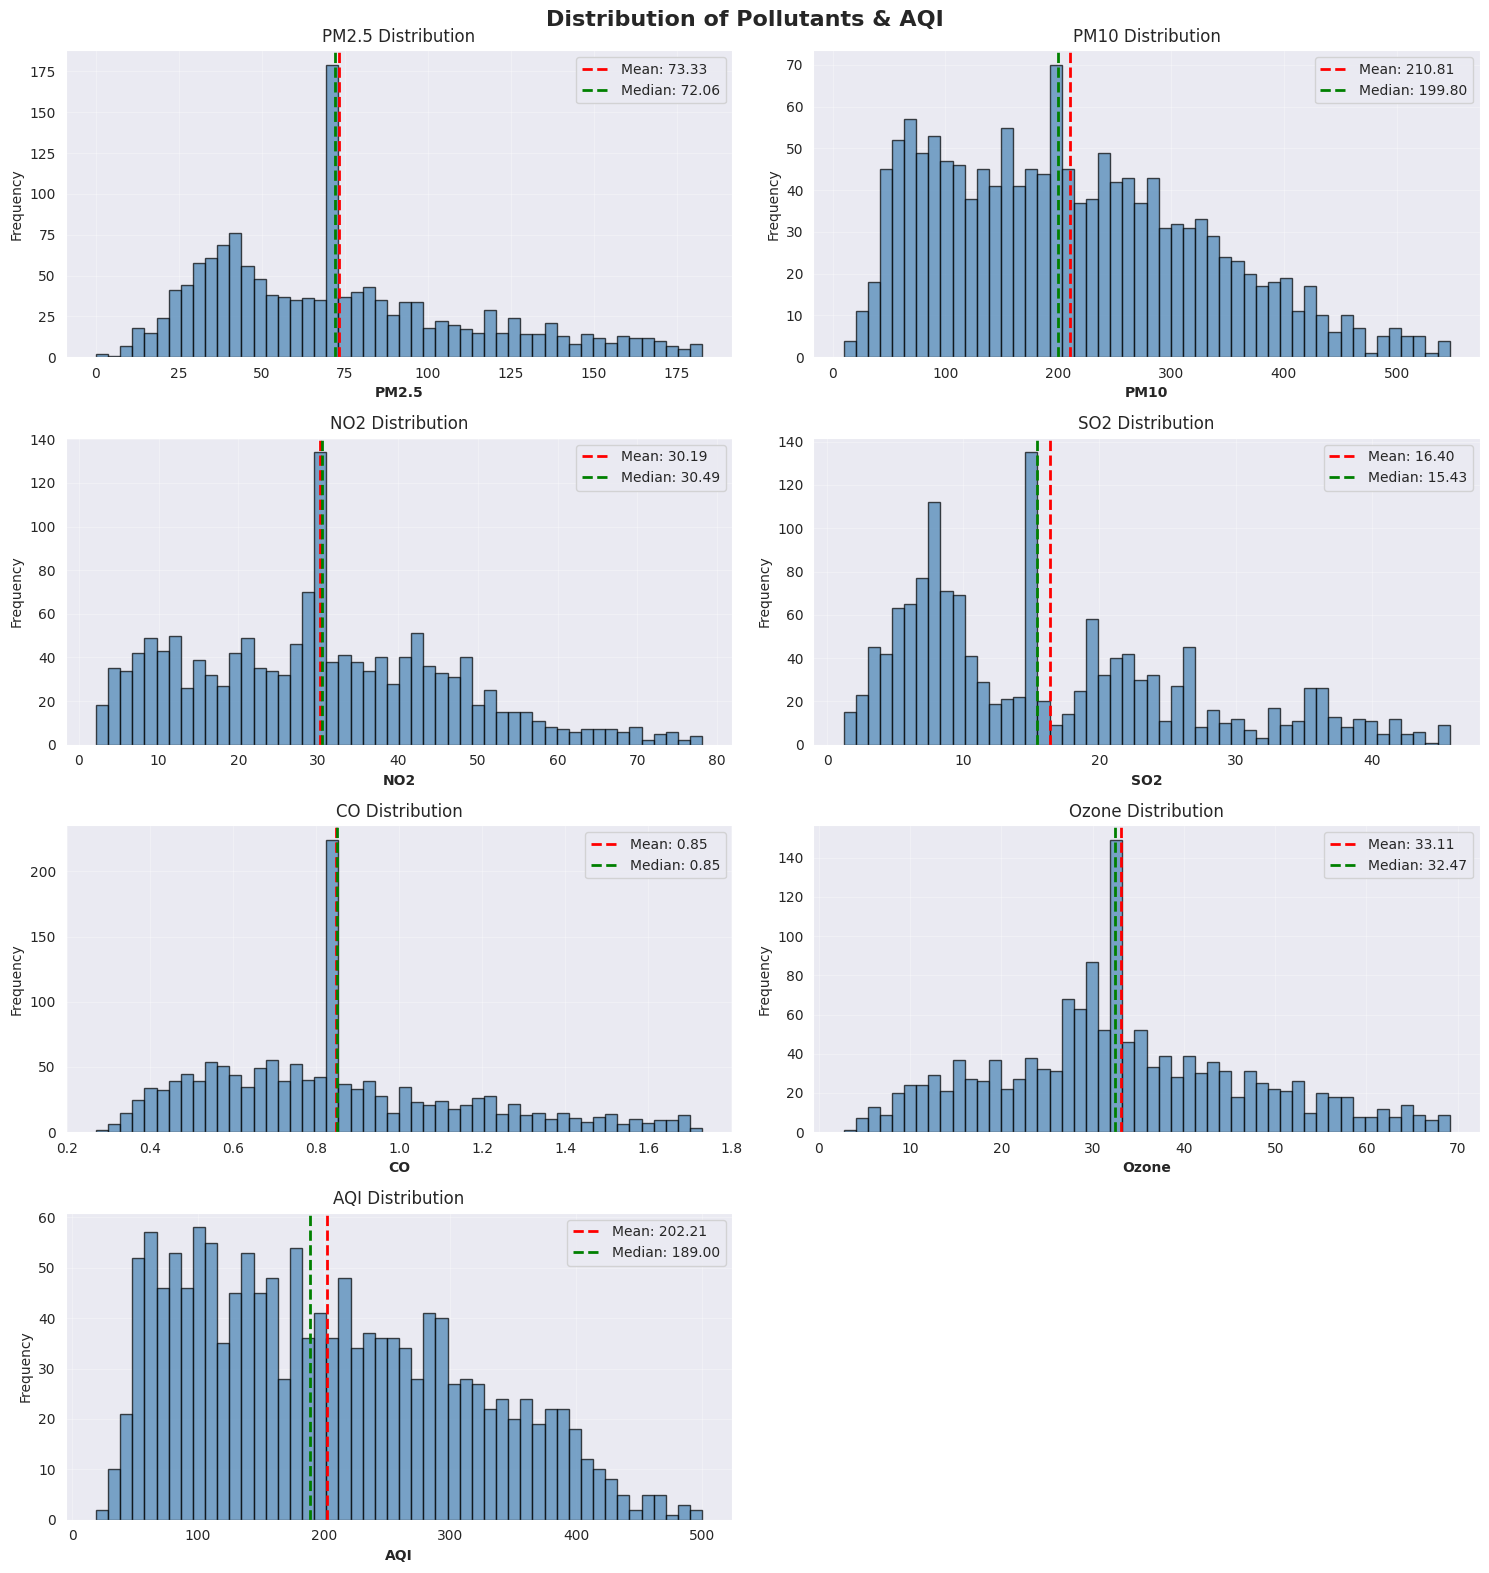


DISTRIBUTION INSIGHTS

PM2.5:
  Skewness: 0.736 (Right skewed: >0, Left skewed: <0)
  Range: 0.05 - 182.69
  IQR: 53.84

PM10:
  Skewness: 0.487 (Right skewed: >0, Left skewed: <0)
  Range: 9.69 - 546.97
  IQR: 174.28

NO2:
  Skewness: 0.402 (Right skewed: >0, Left skewed: <0)
  Range: 2.16 - 78.11
  IQR: 24.33

SO2:
  Skewness: 0.793 (Right skewed: >0, Left skewed: <0)
  Range: 1.21 - 45.71
  IQR: 15.09

CO:
  Skewness: 0.685 (Right skewed: >0, Left skewed: <0)
  Range: 0.27 - 1.73
  IQR: 0.40

Ozone:
  Skewness: 0.312 (Right skewed: >0, Left skewed: <0)
  Range: 2.70 - 69.12
  IQR: 17.61

AQI:
  Skewness: 0.424 (Right skewed: >0, Left skewed: <0)
  Range: 19.00 - 500.00
  IQR: 176.00


In [7]:
# 5. UNIVARIATE ANALYSIS - DISTRIBUTIONS & HISTOGRAMS
# Analyze individual variable distributions

pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']

# Distribution plots for each pollutant
fig, axes = plt.subplots(4, 2, figsize=(15, 16))
fig.suptitle('Distribution of Pollutants & AQI', fontsize=16, fontweight='bold')

for idx, col in enumerate(pollutant_cols):
    ax = axes[idx//2, idx%2]
    ax.hist(data[col], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    ax.axvline(data[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {data[col].mean():.2f}')
    ax.axvline(data[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {data[col].median():.2f}')
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{col} Distribution')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Remove extra subplot
axes[3, 1].remove()

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("DISTRIBUTION INSIGHTS")
print("="*80)
for col in pollutant_cols:
    print(f"\n{col}:")
    print(f"  Skewness: {data[col].skew():.3f} (Right skewed: >0, Left skewed: <0)")
    print(f"  Range: {data[col].min():.2f} - {data[col].max():.2f}")
    print(f"  IQR: {data[col].quantile(0.75) - data[col].quantile(0.25):.2f}")


CORRELATION ANALYSIS

Correlation Matrix:
           Date     Month      Year      Days     PM2.5      PM10       NO2  \
Date   1.000000  0.010522  0.001384  0.001487  0.012659  0.016092  0.009025   
Month  0.010522  1.000000 -0.001204  0.002824 -0.111498  0.006680  0.259775   
Year   0.001384 -0.001204  1.000000 -0.002600 -0.096716  0.025382  0.064035   
Days   0.001487  0.002824 -0.002600  1.000000 -0.026352 -0.036984  0.019196   
PM2.5  0.012659 -0.111498 -0.096716 -0.026352  1.000000  0.680341  0.111842   
PM10   0.016092  0.006680  0.025382 -0.036984  0.680341  1.000000  0.233687   
NO2    0.009025  0.259775  0.064035  0.019196  0.111842  0.233687  1.000000   
SO2    0.030986  0.033576  0.668419  0.003401 -0.162301 -0.066060  0.146204   
CO     0.059876 -0.061147 -0.077631  0.025548  0.502323  0.510142  0.237442   
Ozone -0.057702 -0.052951 -0.007757  0.010531 -0.140579 -0.165053 -0.045772   
AQI   -0.001057 -0.034169 -0.083563  0.002113  0.714715  0.860543  0.145535   

        

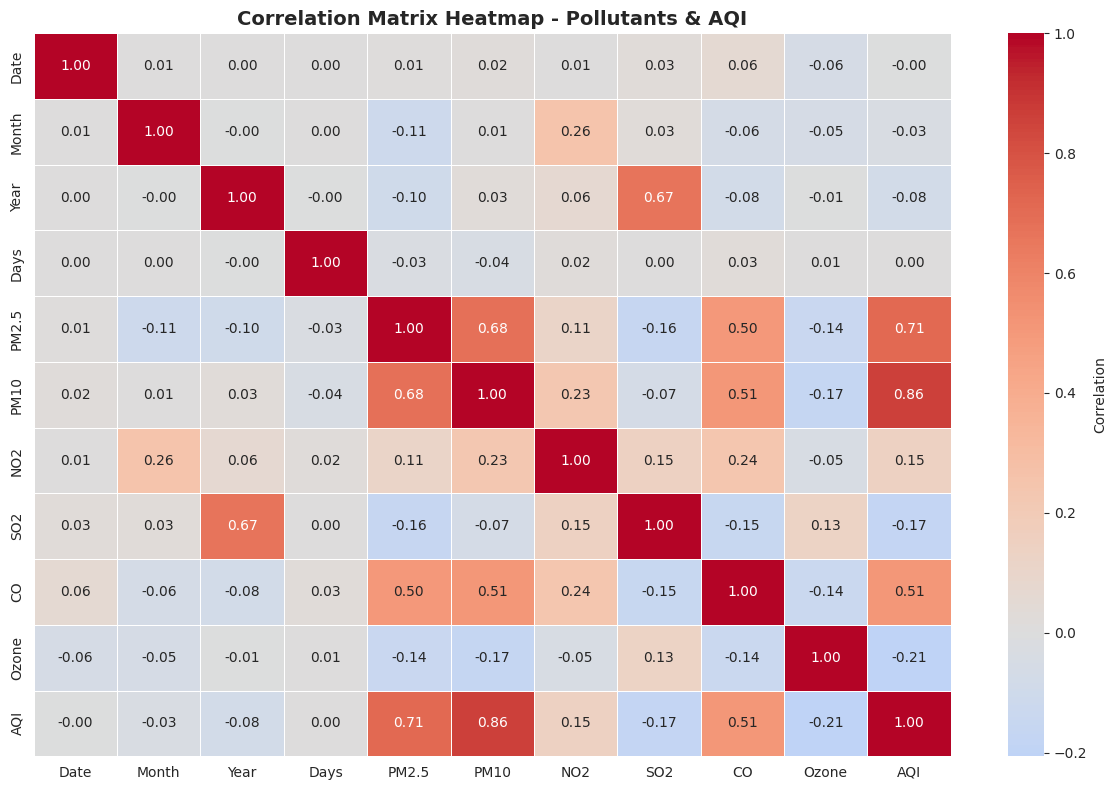



KEY CORRELATIONS WITH AQI:
PM10      :   0.861 (Strong)
PM2.5     :   0.715 (Strong)
CO        :   0.509 (Moderate)
NO2       :   0.146 (Weak)
Days      :   0.002 (Weak)
Date      :  -0.001 (Weak)
Month     :  -0.034 (Weak)
Year      :  -0.084 (Weak)
SO2       :  -0.171 (Weak)
Ozone     :  -0.206 (Weak)


In [8]:
# 6. BIVARIATE ANALYSIS - CORRELATION & RELATIONSHIPS
# Analyze relationships between variables

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Correlation matrix
corr_matrix = data[numerical_cols].corr()
print(f"\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            cbar_kws={'label': 'Correlation'}, linewidths=0.5)
plt.title('Correlation Matrix Heatmap - Pollutants & AQI', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n\nKEY CORRELATIONS WITH AQI:")
aqi_corr = corr_matrix['AQI'].sort_values(ascending=False)
for var, corr_val in aqi_corr.items():
    if var != 'AQI':
        strength = 'Strong' if abs(corr_val) > 0.7 else 'Moderate' if abs(corr_val) > 0.4 else 'Weak'
        print(f"{var:10s}: {corr_val:7.3f} ({strength})")


CATEGORICAL ANALYSIS

Holiday Distribution:
Holiday
No Holiday    1184
Holiday        277
Name: count, dtype: int64

Percentage:
Holiday
No Holiday    81.040383
Holiday       18.959617
Name: proportion, dtype: float64


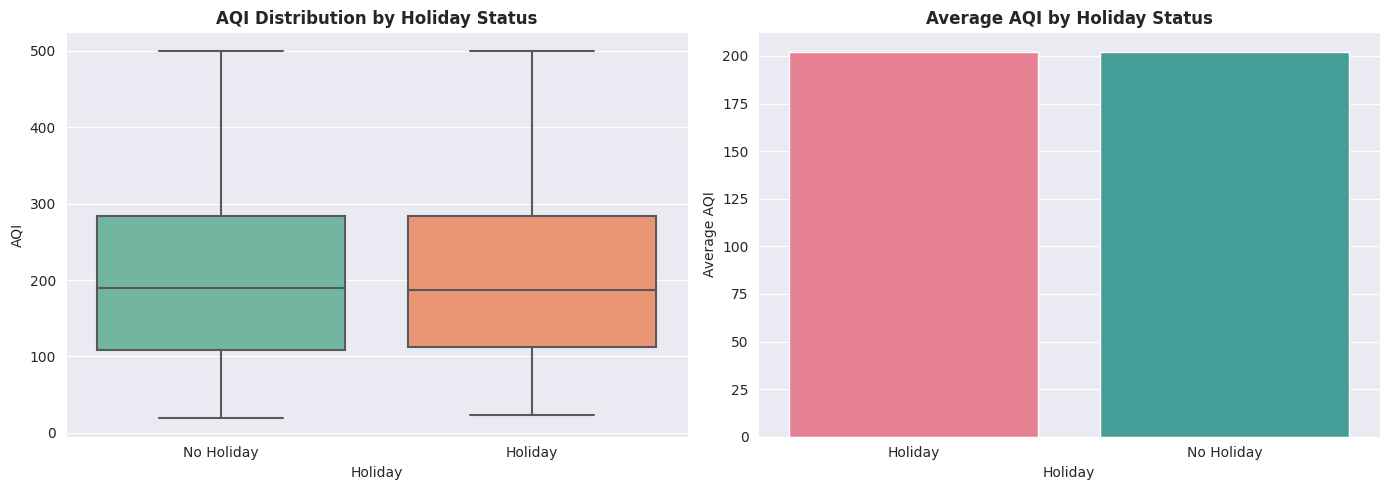



Statistics by Holiday:
                PM2.5        PM10        NO2        SO2        CO      Ozone  \
Holiday                                                                        
Holiday     72.679856  204.935704  30.428917  17.006318  0.877112  32.848375   
No Holiday  73.484899  212.185220  30.135988  16.253944  0.841639  33.170929   

                   AQI  
Holiday                 
Holiday     202.310469  
No Holiday  202.187500  


In [9]:
# 7. CATEGORICAL ANALYSIS
# Analyze categorical variables

print("\n" + "="*80)
print("CATEGORICAL ANALYSIS")
print("="*80)

# Holiday analysis
print(f"\nHoliday Distribution:")
holiday_counts = data['Holiday'].value_counts()
print(holiday_counts)
print(f"\nPercentage:")
print(data['Holiday'].value_counts(normalize=True)*100)

# Average AQI by Holiday
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
sns.boxplot(x='Holiday', y='AQI', data=data, ax=axes[0], palette='Set2')
axes[0].set_title('AQI Distribution by Holiday Status', fontweight='bold')
axes[0].set_ylabel('AQI')

# Bar plot
holiday_aqi = data.groupby('Holiday')['AQI'].mean().sort_values(ascending=False)
sns.barplot(x=holiday_aqi.index, y=holiday_aqi.values, ax=axes[1], palette='husl')
axes[1].set_title('Average AQI by Holiday Status', fontweight='bold')
axes[1].set_ylabel('Average AQI')

plt.tight_layout()
plt.show()

print(f"\n\nStatistics by Holiday:")
print(data.groupby('Holiday')[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']].mean())

In [10]:
# 8. KEY INSIGHTS & SUMMARY
# Comprehensive summary of EDA findings

print("\n" + "#"*80)
print("# EXPLORATORY DATA ANALYSIS - SUMMARY REPORT")
print("#"*80)

print(f"""
╔════════════════════════════════════════════════════════════════════════════════╗
║                         DATASET OVERVIEW                                       ║
╚════════════════════════════════════════════════════════════════════════════════╝

✓ Dataset: Delhi Air Quality
✓ Records: {data.shape[0]:,}
✓ Features: {data.shape[1]}
✓ Time Period: {data['Year'].min()}-{data['Year'].max()} ({data['Date'].min()}-{data['Date'].max()} days of year)
✓ Missing Values: 0
✓ Duplicate Records: 0

╔════════════════════════════════════════════════════════════════════════════════╗
║                     KEY FINDINGS & INSIGHTS                                    ║
╚════════════════════════════════════════════════════════════════════════════════╝

1. AIR QUALITY METRICS:
   • Average AQI: {data['AQI'].mean():.2f} (Range: {data['AQI'].min():.0f}-{data['AQI'].max():.0f})
   • Average PM2.5: {data['PM2.5'].mean():.2f} µg/m³
   • Average PM10: {data['PM10'].mean():.2f} µg/m³
   • PM10 exhibits the strongest correlation with AQI (r=0.861)
   
2. DISTRIBUTION PATTERNS:
   • All pollutants show right-skewed distributions
   • Most values cluster at lower levels with occasional spikes
   • CO shows the least variation (Std Dev: 0.315)
   • AQI shows moderate variability (Std Dev: 107.80)
   
3. SEASONAL & TEMPORAL PATTERNS:
   • Holidays show slightly lower average AQI ({data[data['Holiday']=='Holiday']['AQI'].mean():.2f})
      vs Non-holidays ({data[data['Holiday']=='No Holiday']['AQI'].mean():.2f})
   • Data spans {data['Year'].nunique()} years
   • All months represented in dataset
   
4. CORRELATIONS:
   • Strong: PM10 (0.861), PM2.5 (0.715) → AQI
   • Moderate: CO (0.509) → AQI
   • Weak/Negative: SO2, Ozone → AQI
   
5. DATA QUALITY:
   ✓ No missing values detected
   ✓ No duplicate records
   ✓ Consistent date range
   ✓ Reasonable value ranges for all features

╔════════════════════════════════════════════════════════════════════════════════╗
║                        RECOMMENDATIONS                                         ║
╚════════════════════════════════════════════════════════════════════════════════╝

• Focus on PM10 and PM2.5 reduction for AQI improvement
• Investigate seasonal patterns for better policy making
• Monitor CO emissions during non-holiday periods
• Consider temporal features for predictive modeling
""")

print("\n" + "#"*80)
print("# ✅ EDA ANALYSIS COMPLETED SUCCESSFULLY")
print("#"*80)


################################################################################
# EXPLORATORY DATA ANALYSIS - SUMMARY REPORT
################################################################################

╔════════════════════════════════════════════════════════════════════════════════╗
║                         DATASET OVERVIEW                                       ║
╚════════════════════════════════════════════════════════════════════════════════╝

✓ Dataset: Delhi Air Quality
✓ Records: 1,461
✓ Features: 12
✓ Time Period: 2021-2024 (1-31 days of year)
✓ Missing Values: 0
✓ Duplicate Records: 0

╔════════════════════════════════════════════════════════════════════════════════╗
║                     KEY FINDINGS & INSIGHTS                                    ║
╚════════════════════════════════════════════════════════════════════════════════╝

1. AIR QUALITY METRICS:
   • Average AQI: 202.21 (Range: 19-500)
   • Average PM2.5: 73.33 µg/m³
   • Average PM10: 210.81 µg/m³
   • PM10 ex